In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline

In [2]:
from math import log10
def eng_str(x, u=0, n=1):
    """Print formatted value and its uncertainty in engineering format"""
    y = abs(x)
    exponent = int(log10(y))
    engr_exponent = exponent - exponent%3
    z = y/10**engr_exponent
    sign = '-' if x < 0 else ''
    fmt = "{z:.%df}" % (n)
    xStr = sign+fmt.format(z=z)
    
    # uncertainty
    yU = abs(u)
    zU = yU/10**engr_exponent
    fmtU = "{zU:.%df}" % (n)
    if engr_exponent != 0:
        uStr = " ± "+fmtU.format(zU=zU)+'e'+str(engr_exponent)
    else:
        uStr = " ± "+fmtU.format(zU=zU)
    return xStr + uStr

print(eng_str(123456, 3456, n=1))

123.5 ± 3.5e3


In [5]:
RSens = 100.0

files = glob("../Data/*.csv")
files.sort()
for (i,f) in enumerate(files):
    print(f"{i}: {f}")
iFile = int(input("Enter file number: "))
dataFile = files[iFile]
plotFileFmt = "../Figures/" + dataFile[dataFile.find("2022"):dataFile.find(".csv")] + r"-%02d.png"
iPlot = 0
print(f"Opening {dataFile}")
data = np.genfromtxt(dataFile, delimiter=',', comments='#')
print(f"shape of data is {data.shape}")
print(f"Next plot file is {plotFileFmt % iPlot}")

# Now get board_id
with open(dataFile, 'r') as fp:
    line = fp.readline().strip()
    boardID = line[line.find("=")+2:]
print(f"boardID = {boardID}")

nPoints = data.shape[0]
DAC = data[:,0]
V0 = data[:,1]
dV0 = data[:,2]
V1 = data[:,3]
dV1 = data[:,4]
ISamp = data[:,5]
VSamp = data[:,6]
RSamp = data[:,7]
dVSamp = np.hypot(dV1, 69 * (dV0) / RSens)

print(f"nPoints = {nPoints}")
comment = input("Enter comment: ")

0: ../Data/2022-04-28-1546-DAC.csv
1: ../Data/2022-05-06-1243.csv
2: ../Data/2022-05-19-1450.csv
3: ../Data/2022-05-20-1000.csv
4: ../Data/2022-05-20-1458.csv
5: ../Data/2022-05-24-1234-2W.csv
6: ../Data/2022-05-24-1700.csv
7: ../Data/2022-05-24-2102.csv
8: ../Data/test.csv
Enter file number: 5
Opening ../Data/2022-05-24-1234-2W.csv
shape of data is (65, 8)
Next plot file is ../Figures/2022-05-24-1234-2W-00.png
boardID =  meas2WResis_22b.py
nPoints = 65
Enter comment: 69 Ohm resistor


In [6]:
iGood = list(range(5,53))


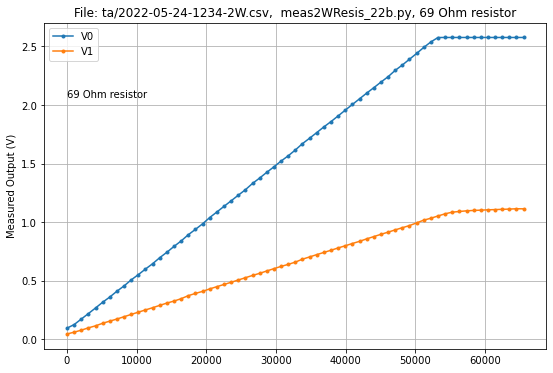

In [8]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.plot(DAC, V0, '.-', label="V0")
ax.plot(DAC, V1, '.-', label="V1")
ax.set_title(f"File: {dataFile[5:]}, {boardID}, {comment}")
ax.grid()
ax.legend()
ax.set_xlabel("")
ax.set_ylabel("Measured Output (V)")
ax.text(0, 0.8*max(V0), comment)
iPlot = 0
fig.savefig(plotFileFmt % iPlot)
iPlot += 1


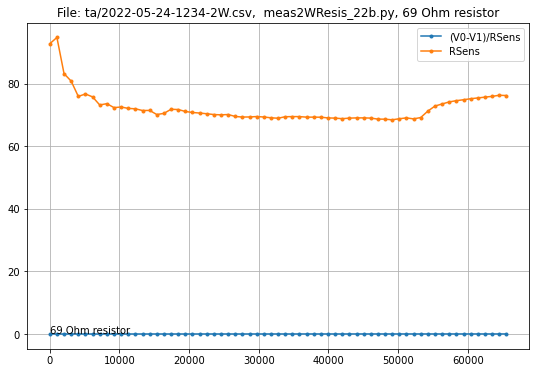

In [10]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.plot(DAC, (V0 - V1)/RSens, '.-', label="(V0-V1)/RSens")
ax.plot(DAC, RSamp, '.-', label="RSens")
ax.set_title(f"File: {dataFile[5:]}, {boardID}, {comment}")
ax.grid()
ax.legend()
ax.set_xlabel("")
ax.text(0, max((V0[:-1] - V1[:-1])/RSens), comment)
iPlot = 1
fig.savefig(plotFileFmt % iPlot)
iPlot += 1


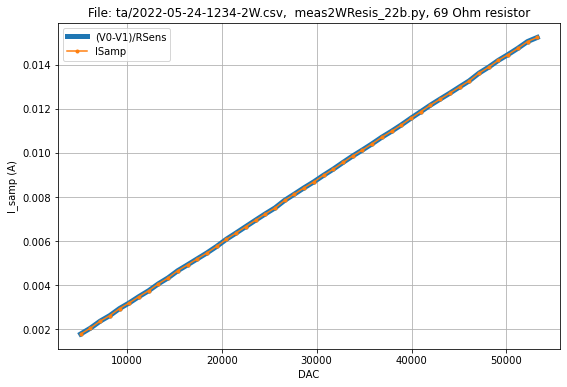

In [11]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.plot(DAC[iGood], (V0[iGood]-V1[iGood])/RSens, '.-', label="(V0-V1)/RSens", lw=5)
ax.plot(DAC[iGood], ISamp[iGood], '.-', label="ISamp")
ax.set_title(f"File: {dataFile[5:]}, {boardID}, {comment}")
ax.grid()
ax.legend()
ax.set_xlabel("DAC")
ax.set_ylabel("I_samp (A)")
#ax.text(0, 3.0, comment)
iPlot = 2
fig.savefig(plotFileFmt % iPlot)
iPlot += 1


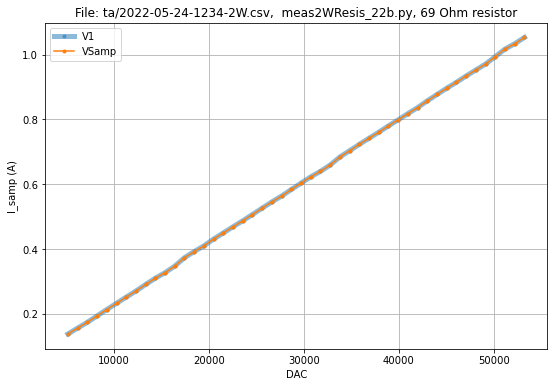

In [12]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.plot(DAC[iGood], V1[iGood], '.-', label="V1", lw=5, alpha=0.5)
ax.plot(DAC[iGood], VSamp[iGood], '.-', label="VSamp")
ax.set_title(f"File: {dataFile[5:]}, {boardID}, {comment}")
ax.grid()
ax.legend()
ax.set_xlabel("DAC")
ax.set_ylabel("I_samp (A)")
#ax.text(0, 3.0, comment)
iPlot = 3
fig.savefig(plotFileFmt % iPlot)
iPlot += 1


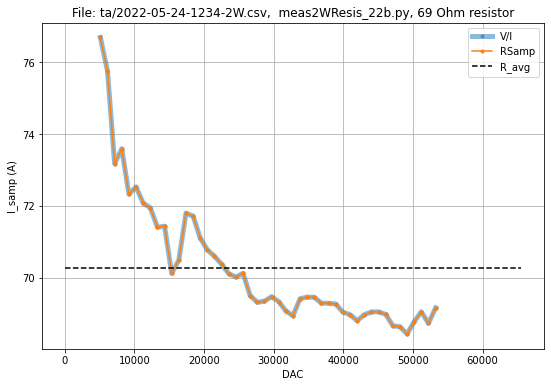

In [13]:
RAvg = RSamp[iGood].mean()

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.plot(DAC[iGood], RSens * V1[iGood]/((V0[iGood]-V1[iGood])), '.-', label="V/I", lw=5, alpha=0.5)
ax.plot(DAC[iGood], RSamp[iGood], '.-', label="RSamp")
ax.plot(DAC, len(DAC)*[RAvg], "k--", label="R_avg")
ax.set_title(f"File: {dataFile[5:]}, {boardID}, {comment}")
ax.grid()
ax.legend()
ax.set_xlabel("DAC")
ax.set_ylabel("I_samp (A)")
#ax.text(0, 3.0, comment)
iPlot = 4
fig.savefig(plotFileFmt % iPlot)
iPlot += 1


In [14]:
# Linear regression to get resistance
# y = a + bx
from math import sqrt

def linRegUnc(x, y):
    """linRegUnc - linear fit with returned uncertainties."""
    len(x)
    len(y) 
    if len(y) != n:
        raise "Need same number of x & y"
    
    n = len(x)
    sumX = x.sum()
    sumX2 = (x * x).sum()
    sumY = y.sum()
    sumXY = (x * y).sum()
    Delta = n * sumX2 - sumX * sumX
    a = (sumX2 * sumY - sumX * sumXY) / Delta
    b = (n*sumXY - sumX * sumY) / Delta
    varA = sumX2 / Delta
    varB = n / Delta
    covAB = -sumX / Delta
    return (a, b, varA, varB, covAB)

def linRegUnc(x, y, sigY=1):
    """linRegUnc - linear fit with returned uncertainties."""
    len(x)
    len(y) 
    n = len(x)
    if len(y) != n:
        raise "Need same number of x & y"
    if hasattr(sigY, '__len__'):
        if len(sigY) != n:
            raise "sigY needs same length x & y"
        S = (1 / (sigY * sigY)).sum()
    else:
        S = n / (sigY * sigY)
    sumX = (x / (sigY * sigY)).sum()
    sumX2 = ((x * x) / (sigY * sigY)).sum()
    sumY = (y / (sigY * sigY)).sum()
    sumXY = ((x * y) / (sigY * sigY)).sum()
    Delta = S * sumX2 - sumX * sumX
    a = (sumX2 * sumY - sumX * sumXY) / Delta
    b = (S * sumXY - sumX * sumY) / Delta
    varA = sumX2 / Delta
    varB = S / Delta
    covAB = -sumX / Delta
    return (a, b, varA, varB, covAB)

def linReg(x, y):
    n = len(x)
    if len(y) != n:
        raise "Need same number of x & y"
    sumX = x.sum()
    sumX2 = (x * x).sum()
    sumY = y.sum()
    sumXY = (x * y).sum()
    slope = (n*sumXY-sumX*sumY)/(n*sumX2-sumX*sumX)
    intercept = (sumY - slope*sumX)/n
    return (intercept, slope)

print(linReg(np.array([0,1,2,3]), np.array([1,3,5,7])))
print(linReg(ISamp[iGood], VSamp[iGood]))
(a, b, varA, varB, covAB) = linRegUnc(ISamp[iGood], VSamp[iGood], dVSamp[iGood])
print(a, b, varA, varB, covAB)
print(np.sqrt(varA), np.sqrt(varB), covAB/sqrt(varA * varB))

pass

(1.0, 2.0)
(0.01589138910848087, 67.71124174427655)
0.015697169647266848 67.72234839209794 6.800778465993208e-07 0.007993271634879149 -6.812793942574109e-05
0.000824668325206759 0.0894050984836947 -0.924024855832843


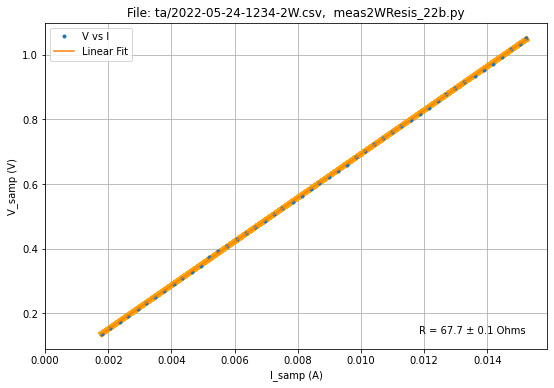

In [15]:
from scipy.stats import multivariate_normal as norm
nRand = 100

RAvg = RSamp[iGood].mean()
(a, b, vA, vB, cAB) = linRegUnc(ISamp[iGood], VSamp[iGood], dVSamp[iGood])
rv = norm([a, b], [[vA, cAB], [cAB, vB]])
dist = rv.rvs(nRand)

nRand = 100
from scipy.stats import multivariate_normal as norm

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.set_title(f"File: {dataFile[5:]}, {boardID}")
for l in dist:
    ax.plot(ISamp[iGood], l[0] + l[1] * ISamp[iGood], '-', lw=5, alpha=10/nRand, color="orange")
ax.plot(ISamp[iGood], VSamp[iGood], '.', label="V vs I")
ax.plot(ISamp[iGood], a + b * ISamp[iGood], '-', label="Linear Fit")
ax.grid()
ax.legend()
ax.set_xlim(left=0)
ax.set_xlabel("I_samp (A)")
ax.set_ylabel("V_samp (V)")
ax.text(max(ISamp[iGood]), min(VSamp[iGood]), f"R = {eng_str(b, sqrt(vB), n=1)} Ohms", ha='right')
iPlot = 5
fig.savefig(plotFileFmt % iPlot)
iPlot += 1


1.0225447444013038 1.9778568375519148 0.039021549213744865 0.11648223645893989 -0.05824111822946994


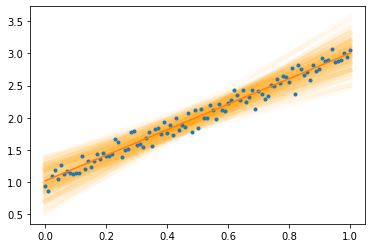

In [16]:
# Test linear fit
from scipy.stats import norm as gauss
from scipy.stats import multivariate_normal as norm
from numpy.random import seed
seed(2221551440)

nRand = 100
from scipy.stats import multivariate_normal as norm

nPoints = 101
noiseAmp = 0.1
seed = 22213
x = np.linspace(0, 1, nPoints)
sim = 1 + 2 * x + gauss.rvs(0, noiseAmp,nPoints)
(a, b, vA, vB, cAB) = linRegUnc(x, sim)

rv = norm([a, b], [[vA, cAB], [cAB, vB]])
dist = rv.rvs(nRand)
for l in dist:
    plt.plot((0,1), (l[0], l[0] + l[1]), '-', lw=5, alpha=5/nRand, color="orange")

print(a, b, vA, vB, cAB)
plt.plot(x, sim, '.')
plt.plot((0,1),(a, a + 1 * b), '-')

